In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("../..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

In [3]:
params = parse_experiment_params("../../experiments_params/backup_to_organize/case_4.json")

In [4]:
results = get_experiment_mean_data(params, "../../results/case_4/")

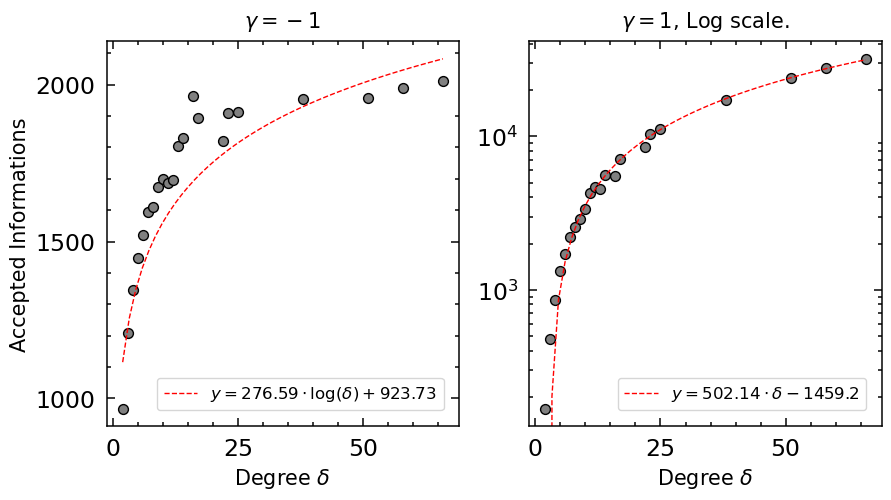

In [5]:
nrows = 1
ncols = 2
titles = [rf"$\gamma = {k}$" for k in [-1, 1]]
titles[1] = titles[1] + ", Log scale."
# titles[2] = titles[2] + ", Log scale."

title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Accepted Informations"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Degree $\delta$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

measure = 'transmissions'
marksize = 50

selected_params = [x for x in params if x['gamma'] == -1]
degrees = []
counts = []
for p in selected_params:
    degrees.append(list(results[make_tuple(p)][measure].keys()))
    counts.append(list(results[make_tuple(p)][measure].values()))
    
degrees = degrees[0]
counts  = np.array(counts).mean(axis = 0)

axs[0].scatter(degrees, counts, c = 'grey', edgecolors = 'k', s = marksize)
    
p = np.polyfit(np.log(degrees), counts, 1, w = np.abs(np.linspace(-1, 1, len(counts))))
a = p[0]
b = p[1]
x_fitted = np.linspace(np.min(degrees), np.max(degrees), 50)
y_fitted = a*np.log(x_fitted) + b
axs[0].plot(x_fitted, y_fitted, 'r--', linewidth = 1, label = r'$y = {}\cdot \log(\delta) {} {}$'.format(
    np.round(a, 2),
    '+' if b > 0 else '',
    np.round(b, 2)
))

axs[0].legend(fontsize = 12, loc = 'lower right', bbox_to_anchor = (0.98, 0.02))
    
    
    
# selected_params = [x for x in params if x['gamma'] == 0]
# degrees = []
# counts = []
# for p in selected_params:
#     degrees.append(list(results[make_tuple(p)][measure].keys()))
#     counts.append(list(results[make_tuple(p)][measure].values()))
    
# degrees = degrees[0]
# counts  = np.array(counts).mean(axis = 0)

# axs[1].set_yscale('log')
# axs[1].scatter(degrees, counts, c = 'grey', edgecolors = 'k', s = marksize)
    
# p = np.polyfit(degrees, counts, 1, w = counts)
# a = p[0]
# b = p[1]
# x_fitted = np.linspace(np.min(degrees), np.max(degrees), 50)
# y_fitted = a*x_fitted + b
# axs[1].plot(x_fitted, y_fitted, 'r--', linewidth = 1, label = rf'$y = {np.round(a, 2)}\cdot \delta + {np.round(b, 2)}$')

# axs[1].legend(fontsize = 12, loc = 'lower right', bbox_to_anchor = (0.98, 0.02))
    
    
    
    
selected_params = [x for x in params if x['gamma'] == 1]
degrees = []
counts = []
for p in selected_params:
    degrees.append(list(results[make_tuple(p)][measure].keys()))
    counts.append(list(results[make_tuple(p)][measure].values()))
    
degrees = degrees[0]
counts  = np.array(counts).mean(axis = 0)

axs[1].set_yscale('log')
axs[1].scatter(degrees, counts, c = 'grey', edgecolors = 'k',  s = marksize)

    
p = np.polyfit(degrees, counts, 1)
a = p[0]
b = p[1]
x_fitted = np.linspace(np.min(degrees), np.max(degrees), 50)
y_fitted = a*x_fitted + b
axs[1].plot(x_fitted, y_fitted, 'r--', linewidth = 1, label = r'$y = {}\cdot \delta {} {}$'.format(
    np.round(a, 2),
    '+' if b > 0 else '',
    np.round(b, 2)
))

axs[1].legend(fontsize = 12, loc = 'lower right', bbox_to_anchor = (0.98, 0.02))

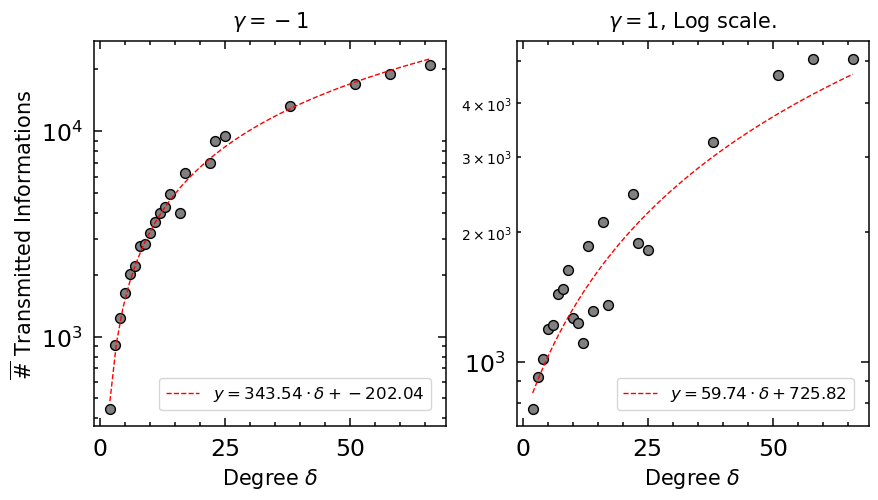

In [8]:
nrows = 1
ncols = 2
titles = [rf"$\gamma = {k}$" for k in [-1, 1]]
titles[1] = titles[1] + ", Log scale."
# titles[2] = titles[2] + ", Log scale."

title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"$\overline{\#}$ Transmitted Informations"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Degree $\delta$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

measure = 'acceptances'
marksize = 50

selected_params = [x for x in params if x['gamma'] == -1]
degrees = []
counts = []
for p in selected_params:
    degrees.append(list(results[make_tuple(p)][measure].keys()))
    counts.append(list(results[make_tuple(p)][measure].values()))
    
degrees = degrees[0]
counts  = np.array(counts).mean(axis = 0)

axs[0].set_yscale('log')
axs[0].scatter(degrees, counts, c = 'grey', edgecolors = 'k', s = marksize)
    
p = np.polyfit(degrees, counts, 1, w = 1/counts)
a = p[0]
b = p[1]
x_fitted = np.linspace(np.min(degrees), np.max(degrees), 50)
y_fitted = a*x_fitted + b
axs[0].plot(x_fitted, y_fitted, 'r--', linewidth = 1, label = rf'$y = {np.round(a, 2)}\cdot \delta + {np.round(b, 2)}$')

axs[0].legend(fontsize = 12, loc = 'lower right', bbox_to_anchor = (0.98, 0.02))  
    
    
selected_params = [x for x in params if x['gamma'] == 0]
degrees = []
counts = []
for p in selected_params:
    degrees.append(list(results[make_tuple(p)][measure].keys()))
    counts.append(list(results[make_tuple(p)][measure].values()))
    
degrees = degrees[0]
counts  = np.array(counts).mean(axis = 0)

# axs[1].set_yscale('log')
# axs[1].scatter(degrees, counts, c = 'grey', edgecolors = 'k', s = marksize)
    
# p = np.polyfit(degrees, counts, 1, w = 1/counts)
# a = p[0]
# b = p[1]
# x_fitted = np.linspace(np.min(degrees), np.max(degrees), 50)
# y_fitted = a*x_fitted + b
# axs[1].plot(x_fitted, y_fitted, 'r--', linewidth = 1, label = rf'$y = {np.round(a, 2)}\cdot \delta + {np.round(b, 2)}$')

# axs[1].legend(fontsize = 12, loc = 'lower right', bbox_to_anchor = (0.98, 0.02))  
    
    
selected_params = [x for x in params if x['gamma'] == 1]
degrees = []
counts = []
for p in selected_params:
    degrees.append(list(results[make_tuple(p)][measure].keys()))
    counts.append(list(results[make_tuple(p)][measure].values()))
    
degrees = degrees[0]
counts  = np.array(counts).mean(axis = 0)

axs[1].set_yscale('log')
axs[1].scatter(degrees, counts, c = 'grey', edgecolors = 'k',  s = marksize)

p = np.polyfit(degrees, counts, 1, w = 1/counts)
a = p[0]
b = p[1]
x_fitted = np.linspace(np.min(degrees), np.max(degrees), 50)
y_fitted = a*x_fitted + b
axs[1].plot(x_fitted, y_fitted, 'r--', linewidth = 1, label = rf'$y = {np.round(a, 2)}\cdot \delta + {np.round(b, 2)}$')

axs[1].legend(fontsize = 12, loc = 'lower right', bbox_to_anchor = (0.98, 0.02))  